In [1]:
from csv import reader
opened_file = open('Binance FCAS List - 09_05_20 - Sheet1.csv')
read_file = reader(opened_file)
fcas_data = list(read_file)
fcas_data_header = fcas_data[0]
fcas_data = (fcas_data[1:])

# Part 1: Isolating Technologically Undervalued Binance Coins

## 1.1 - Arranging Data
Converting all the data into a nice clean dataframe.

In [2]:
import numpy as np
import pandas as pd

In [3]:
fcas_array = np.array([fcas_data])
fcas_df = pd.read_csv('Binance FCAS List - 09_05_20 - Sheet1.csv', index_col=0)

In [4]:
from IPython.display import display, HTML
# ethereum is an outilier by marketcap/fcas ratio so it will be removed
# display(fcas_df)

These are all the major statistics from our most important columns

In [5]:
fcas_df.describe()

,FCAS,DEV. BEHAVIOR,USER ACTIVITY,MARKET MATURITY
count,133.000000,133.000000,133.000000,132.000000
mean,609.285714,671.270677,538.834586,760.757576
std,218.683962,223.189148,264.603568,92.527786
min,151.000000,113.000000,22.000000,533.000000
25%,463.000000,485.000000,374.000000,720.000000
50%,674.000000,739.000000,555.000000,777.000000
75%,792.000000,862.000000,772.000000,830.250000
max,936.000000,968.000000,977.000000,955.000000


## 1.2 - Data Cleaning

- Removing non numerical characters and converting to float type for all columns that will be used for analysis.
- Removing outliers (high market cap coins)

In [6]:
fcas_df['MARKET CAP'] = fcas_df['MARKET CAP'].astype(str)

In [7]:
fcas_df['MARKET CAP'] = fcas_df['MARKET CAP'].str.replace('$','').str.replace(',','')
fcas_df['MARKET CAP'] = fcas_df['MARKET CAP'].astype(float)
fcas_df['FCAS'] = fcas_df['FCAS'].astype(float)
fcas_df['DEV. BEHAVIOR'] = fcas_df['DEV. BEHAVIOR'].astype(float)
fcas_df['USER ACTIVITY'] = fcas_df['USER ACTIVITY'].astype(float)
fcas_df['MARKET MATURITY'] = fcas_df['MARKET MATURITY'].astype(float)

Coins with a Market Cap above 3Billion will be removed because they are outliers prevent picks being destributed across all market cap ranges. At the time of writing this code, there are four coins: Ripple, Chainlink, Litecoin, and Binance Coin.

In [8]:
fcas_df = fcas_df.loc[fcas_df['MARKET CAP'] < 3000000000]

In [9]:
fcas_df['1D'] = fcas_df['1D'].str.replace('%','')
fcas_df['5D'] = fcas_df['5D'].str.replace('%','')
fcas_df['1M'] = fcas_df['1M'].str.replace('%','')
fcas_df['6M'] = fcas_df['6M'].str.replace('%','')
fcas_df['1Y'] = fcas_df['1Y'].str.replace('%','')

fcas_df['1D'] = fcas_df['1D'].astype(float)
fcas_df['5D'] = fcas_df['5D'].astype(float)
fcas_df['1M'] = fcas_df['1M'].astype(float)
fcas_df['6M'] = fcas_df['6M'].astype(float)
fcas_df['1Y'] = fcas_df['1Y'].astype(float)

## 1.3 - Determining FCAS and Mcap Relationships

Below are four scaterplots. On the x-axis is all 4 different FCAS types (comprehensive, dev, user, and market maturity). On the y-axis of all plots is the market caps of coins. This shows the relationship between each set and their correlation.

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

ax1.scatter(fcas_df['FCAS'], fcas_df['MARKET CAP'])
ax1.set_xlabel('FCAS')
ax1.set_ylabel('Market Cap in dollars')
ax1.set_title('Comprehensive FCAS')

ax2.scatter(fcas_df['DEV. BEHAVIOR'], fcas_df['MARKET CAP'])
ax2.set_xlabel('Dev FCAS')
ax2.set_ylabel('Market Cap in dollars')
ax2.set_title('Developer FCAS')

ax3.scatter(fcas_df['USER ACTIVITY'], fcas_df['MARKET CAP'])
ax3.set_xlabel('User FCAS')
ax3.set_ylabel('Market Cap in dollars')
ax3.set_title('User Activity FCAS')

ax4.scatter(fcas_df['MARKET MATURITY'], fcas_df['MARKET CAP'])
ax4.set_xlabel('Market Maturity FCAS')
ax4.set_ylabel('Market Cap in dollars')
ax4.set_title('Market Maturity FCAS')

print('FCAS Correlation')
print(np.corrcoef(fcas_df['FCAS'], fcas_df['MARKET CAP']))
print('\n')
print('Dev FCAS Correlation')
print(np.corrcoef(fcas_df['DEV. BEHAVIOR'], fcas_df['MARKET CAP']))
print('\n')
print('User FCAS Correlation')
print(np.corrcoef(fcas_df['USER ACTIVITY'], fcas_df['MARKET CAP']))
print('\n')
print('Market Maturity FCAS Correlation')
print(np.corrcoef(fcas_df['MARKET MATURITY'], fcas_df['MARKET CAP']))
print('\n')

FCAS Correlation
[[1.         0.44137275]
 [0.44137275 1.        ]]


Dev FCAS Correlation
[[1.         0.32728936]
 [0.32728936 1.        ]]


User FCAS Correlation
[[1.         0.46825123]
 [0.46825123 1.        ]]


Market Maturity FCAS Correlation
[[nan nan]
 [nan  1.]]




## 1.4 - Normalizing FCAS and Mcap Relationships

Need to normalize market cap with a log tranformation so as to work with a linear relationship instead of an exponential one. This is not a reliable mechanism for normalizing data because it underepresents how the importance of FCAS is exponential higher at the highest levels. This will be compensated for later with a Farazdaghi-Harris Model for normalized analysis.

In [11]:
fcas_df['norm_mcap'] = np.log(fcas_df['MARKET CAP'])

array([[1.        , 0.59389552],
       [0.59389552, 1.        ]])

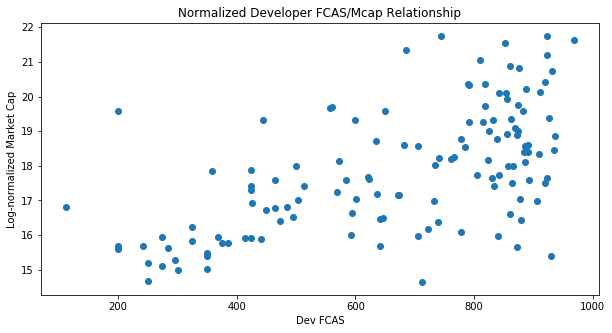

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
fcas = fcas_df['DEV. BEHAVIOR']
mcap = fcas_df['norm_mcap']
ax.scatter(fcas, mcap)

ax.set_xlabel('Dev FCAS')
ax.set_ylabel('Log-normalized Market Cap')
ax.set_title('Normalized Developer FCAS/Mcap Relationship')

np.corrcoef(mcap, fcas)

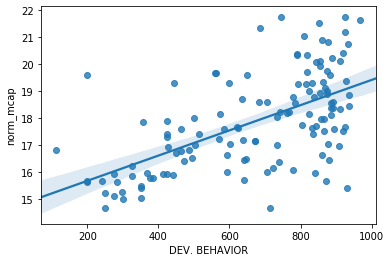

In [13]:
import seaborn as sns
sns.regplot(fcas_df['DEV. BEHAVIOR'],fcas_df['norm_mcap'])

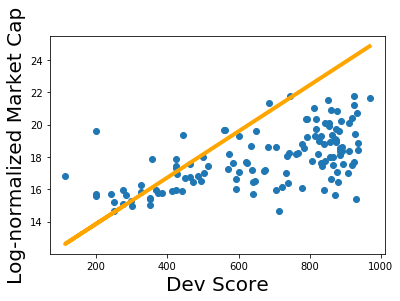

C:\Users\Evan McFarland\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              norm_mcap   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     69.75
Date:                Sat, 05 Sep 2020   Prob (F-statistic):           9.51e-14
Time:                        11:06:43   Log-Likelihood:                -229.81
No. Observations:                 130   AIC:                             463.6
Df Residuals:                     128   BIC:                             469.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            14.7334      0.395     37.262      0.000      13.951      15.516
DEV. BEHAVIOR     0.0047      0.001      8.352      0.000       0.004       0.006
==============================================================================
Omnibus:                        1.691   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.429   Jarque-Bera (JB):                1.286
Skew:                           0.227   Prob(JB):                        0.526
Kurtosis:                       3.175   Cond. No.                     2.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
import statsmodels.api as sm

x1 = fcas_df['DEV. BEHAVIOR']
y = fcas_df['norm_mcap']

plt.scatter(x1,y)
yhat = 0.0143*x1 + 11
fig = plt.plot(x1, yhat, lw=4, c='orange', label = 'regression line')
plt.xlabel('Dev Score', fontsize = 20)
plt.ylabel('Log-normalized Market Cap', fontsize = 20)
plt.show()

x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

In [15]:
# x1 = fcas_df['DEV. BEHAVIOR']
# y = fcas_df['norm_mcap']

# a = 7.39E-2
# b = -9.94448E-11
# c = 2.83

# plt.scatter(x1,y)
# yhat = (1 / (a+b*x1**c))
# fig = plt.plot(x1, yhat, lw=2, c='orange', label = 'regression line')
# plt.xlabel('Dev Score', fontsize = 20)
# plt.ylabel('Log-normalized Market Cap', fontsize = 20)
# plt.show()

In [16]:
x1 = fcas_df['DEV. BEHAVIOR']
fcas_df['theoretical_dev_norm_mcap'] = yhat
fcas_df['dev_mcap'] = fcas_df['theoretical_dev_norm_mcap'] - fcas_df['norm_mcap']
# fcas_df['diff_theoretical_dev_norm_mcap'] = fcas_df['diff_theoretical_dev_norm_mcap'] * (15.2823 / 0.0042)

In [17]:
stdev = fcas_df['dev_mcap'].std()
mean = fcas_df['dev_mcap'].mean()
fcas_df['dev_zscore'] = (fcas_df['dev_mcap'] - mean) / stdev

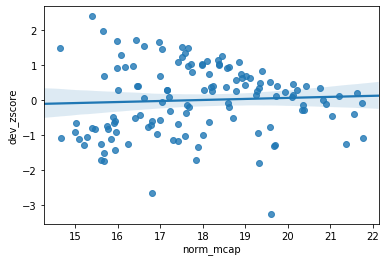

In [18]:
import seaborn as sns
sns.regplot(fcas_df['norm_mcap'],fcas_df['dev_zscore'])

In [19]:
fcas_df['dev_zscore'] = (fcas_df['norm_mcap']**4.5 / 117135) * fcas_df['dev_zscore']

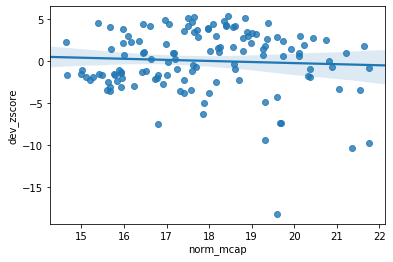

In [20]:
sns.regplot(fcas_df['norm_mcap'],fcas_df['dev_zscore'])

# 1.5 - Assigning a Technology Valuation Metric (dev_zscore)

In [21]:
stdev = fcas_df['dev_zscore'].std()
mean = fcas_df['dev_zscore'].mean()
fcas_df['dev_zscore'] = (fcas_df['dev_zscore'] - mean) / stdev

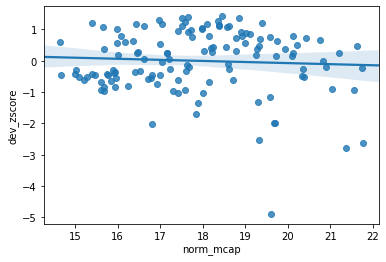

In [22]:
sns.regplot(fcas_df['norm_mcap'],fcas_df['dev_zscore'])

# 1.6 - Normalizing Change in FCAS
### Relative Importance For Each Timeframe
- 1Day - 5%
- 5Day - 25%
- 1Month - 45%
- 6Month - 15%
- 1Year - 10%

In [23]:
mean = fcas_df['1D'].mean()
stdev = fcas_df['1D'].std()
fcas_df['1D_zscore'] = (fcas_df['1D'] - mean) / stdev

mean = fcas_df['5D'].mean()
stdev = fcas_df['5D'].std()
fcas_df['5D_zscore'] = (fcas_df['5D'] - mean) / stdev

mean = fcas_df['1M'].mean()
stdev = fcas_df['1M'].std()
fcas_df['1M_zscore'] = (fcas_df['1M'] - mean) / stdev

mean = fcas_df['6M'].mean()
stdev = fcas_df['6M'].std()
fcas_df['6M_zscore'] = (fcas_df['6M'] - mean) / stdev

mean = fcas_df['1Y'].mean()
stdev = fcas_df['1Y'].std()
fcas_df['1Y_zscore'] = (fcas_df['1Y'] - mean) / stdev

print(fcas_df['1D_zscore'].mean())
print(fcas_df['5D_zscore'].mean())
print(fcas_df['1M_zscore'].mean())
print(fcas_df['6M_zscore'].mean())
print(fcas_df['1Y_zscore'].mean())
print('\n')
print(fcas_df['1D_zscore'].std())
print(fcas_df['5D_zscore'].std())
print(fcas_df['1M_zscore'].std())
print(fcas_df['6M_zscore'].std())
print(fcas_df['1Y_zscore'].std())
#We can confirm that these results are acurate because all the z-scores have an mean of zero and a standard deviation of 1

7.632783294297952e-18
-3.505475824146979e-17
7.539375107129969e-18
0.0
9.494169119314334e-17


1.000000000000001
1.0
1.0
0.9999999999999997
1.0


In [24]:
fcas_df['1D_zscore_proportion'] = fcas_df['1D_zscore'] *0.05
fcas_df['5D_zscore_proportion'] = fcas_df['5D_zscore'] *0.25
fcas_df['1M_zscore_proportion'] = fcas_df['1M_zscore'] *0.45
fcas_df['6M_zscore_proportion'] = fcas_df['6M_zscore'] *0.15
fcas_df['1Y_zscore_proportion'] = fcas_df['1Y_zscore'] *0.10

fcas_df['%change_zscore'] = ((fcas_df['1D_zscore_proportion'] + fcas_df['5D_zscore_proportion']\
+ fcas_df['1M_zscore_proportion'] + fcas_df['6M_zscore_proportion'] + fcas_df['1Y_zscore_proportion'])\
* (fcas_df['norm_mcap']**4.5 / 117135)) # This equation is used to give a higher signficance to %changes for those with 
# higher Mcap, i.e., a 1 day %change of 5 is not a big deal for small crytos but is a big deal for larger cryptos

# 1.7 - Assigning a Change in FCAS Valuation Metric (%change_zscore)

In [25]:
stdev = fcas_df['%change_zscore'].std()
mean = fcas_df['%change_zscore'].mean()
fcas_df['%change_zscore'] = (fcas_df['%change_zscore'] - mean) / stdev

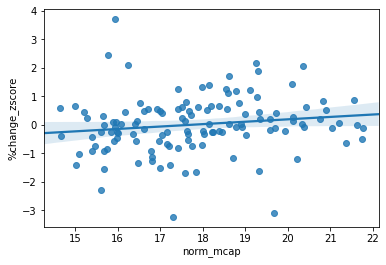

In [26]:
sns.regplot(fcas_df['norm_mcap'],fcas_df['%change_zscore'])

# 1.8 - Combining dev_score and %change_zscore Into Final Valuation Score

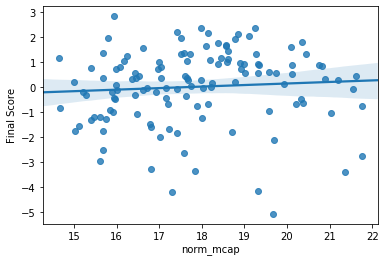

In [27]:
fcas_df['Final Score'] = fcas_df['%change_zscore'] + fcas_df['dev_zscore']

sns.regplot(fcas_df['norm_mcap'],fcas_df['Final Score'])

# 1.9 Fact Checking Final Valuation Score

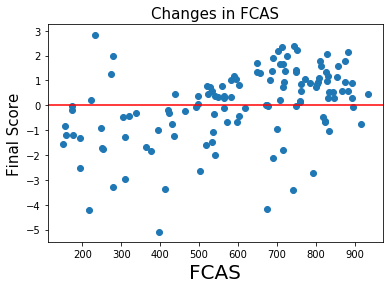

count    126.000000
mean       0.014149
std        1.496730
min       -5.082453
25%       -0.740558
50%        0.302382
75%        1.021595
max        2.845765
Name: Final Score, dtype: float64

In [28]:
x = fcas_df['FCAS']
y = fcas_df['Final Score']

plt.scatter(x,y)
plt.xlabel('FCAS', fontsize = 20)
plt.ylabel('Final Score', fontsize = 15)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Changes in FCAS', fontsize = 15)
plt.show()
fcas_df['Final Score'].describe()

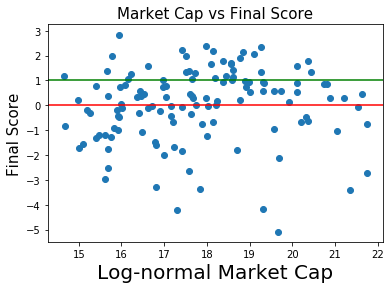

count    126.000000
mean       0.014149
std        1.496730
min       -5.082453
25%       -0.740558
50%        0.302382
75%        1.021595
max        2.845765
Name: Final Score, dtype: float64

In [29]:
x = fcas_df['norm_mcap']
y = fcas_df['Final Score']

plt.scatter(x,y)
plt.xlabel('Log-normal Market Cap', fontsize = 20)
plt.ylabel('Final Score', fontsize = 15)
plt.axhline(y=1, color='g', linestyle='-')
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Market Cap vs Final Score', fontsize = 15)
plt.show()
fcas_df['Final Score'].describe()

# 1.10 - Using Final Valuation Score to Clean Data

In [30]:
fcas_df = fcas_df.loc[fcas_df['Final Score'] > 1.5]

In [31]:
fcas_df = fcas_df.sort_values('Final Score')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
fcas_df

,MARKET CAP,FCAS,DEV. BEHAVIOR,USER ACTIVITY,MARKET MATURITY,1D,5D,1M,6M,1Y,1D.1,5D.1,1M.1,6M.1,1Y.1,1D.2,5D.2,1M.2,6M.2,1Y.2,1D.3,5D.3,1M.3,6M.3,1Y.3,norm_mcap,theoretical_dev_norm_mcap,dev_mcap,dev_zscore,1D_zscore,5D_zscore,1M_zscore,6M_zscore,1Y_zscore,1D_zscore_proportion,5D_zscore_proportion,1M_zscore_proportion,6M_zscore_proportion,1Y_zscore_proportion,%change_zscore,Final Score
PROJECT,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Gas GAS,1.646063e+07,814.0,861.0,772.0,731.0,0.12,0.61,5.57,8.67,8.24,0.00%,-0.12%,0.46%,8.98%,5.64%,0.12%,1.57%,14.88%,9.34%,9.50%,0.41%,0.13%,-0.28%,3.39%,21.83%,16.616482,23.3123,6.695818,1.101040,0.357987,0.397676,0.614265,0.271439,0.050244,0.017899,0.099419,0.276419,0.040716,0.005024,0.472916,1.573956
OmiseGO OMG,5.372790e+08,856.0,842.0,867.0,890.0,0.00,-0.35,7.00,17.42,7.67,0.11%,-0.12%,3.43%,14.71%,2.18%,0.00%,-0.58%,10.44%,22.11%,12.45%,-0.23%,-0.34%,12.09%,11.94%,20.43%,20.102028,23.0406,2.938572,0.154397,0.253465,0.126977,0.783731,0.830772,0.023835,0.012673,0.031744,0.352679,0.124616,0.002384,1.439914,1.594311
Golem GNT,1.154146e+08,717.0,886.0,488.0,813.0,-0.28,-0.97,5.59,9.29,5.90,-0.12%,-0.12%,1.83%,4.11%,0.22%,-0.82%,-3.18%,12.96%,19.90%,12.96%,-0.13%,0.24%,11.52%,16.97%,31.98%,18.564041,23.6698,5.105759,1.092476,0.009581,-0.047849,0.616635,0.311072,-0.058172,0.000479,-0.011962,0.277486,0.046661,-0.005817,0.552916,1.645391
Komodo KMD,7.256284e+07,709.0,886.0,537.0,732.0,0.00,0.14,1.57,15.47,22.45,0.00%,-0.12%,-0.79%,0.68%,0.79%,0.00%,0.00%,-2.37%,2.28%,168.50%,-1.62%,-1.22%,5.02%,7.64%,20.00%,18.099963,23.6698,5.569837,1.162760,0.253465,0.265146,0.140232,0.706120,0.708617,0.012673,0.066286,0.063104,0.105918,0.070862,0.508197,1.670957
Nano NANO,1.145272e+08,648.0,785.0,500.0,780.0,0.30,1.72,4.51,22.49,21.12,0.38%,1.15%,1.55%,9.02%,-1.14%,0.00%,2.66%,2.66%,8.22%,150.00%,0.90%,0.38%,7.43%,10.79%,27.65%,18.556323,22.2255,3.669177,0.438150,0.514769,0.710671,0.488646,1.154865,0.646995,0.025738,0.177668,0.219891,0.173230,0.064700,1.260023,1.698173
Storj STORJ,9.644052e+07,812.0,885.0,705.0,899.0,-0.62,-0.50,5.31,6.56,24.34,-0.23%,-0.57%,-0.45%,1.25%,-0.90%,-1.27%,-0.85%,11.90%,9.64%,89.51%,-0.12%,1.92%,20.50%,36.62%,57.99%,18.384437,23.6555,5.271063,1.117506,-0.286563,0.084680,0.583452,0.136560,0.796183,-0.014328,0.021170,0.262554,0.020484,0.079618,0.646695,1.764201
ETHLend LEND,6.960421e+08,874.0,818.0,940.0,895.0,0.11,0.22,3.55,25.93,57.19,0.00%,0.00%,2.12%,2.76%,29.43%,0.10%,0.10%,4.91%,63.19%,97.06%,0.78%,2.28%,4.92%,36.22%,88.81%,20.360921,22.6974,2.336479,-0.251284,0.349276,0.287704,0.374878,1.374762,2.318177,0.017464,0.071926,0.168695,0.206214,0.231818,2.050919,1.799635
Siacoin SC,1.438525e+08,689.0,839.0,537.0,786.0,0.00,0.29,3.29,21.73,46.90,0.00%,-0.12%,0.00%,7.28%,24.85%,0.00%,0.00%,2.28%,0.00%,168.50%,0.12%,0.12%,5.64%,13.91%,41.11%,18.784299,22.9977,4.213401,0.724202,0.253465,0.307443,0.344066,1.106283,1.841425,0.012673,0.076861,0.154830,0.165942,0.184142,1.193671,1.917873
Ark ARK,4.042342e+07,727.0,920.0,537.0,738.0,0.13,0.27,2.68,17.63,26.43,0.00%,-0.22%,0.65%,2.79%,4.54%,0.00%,0.00%,2.28%,2.28%,168.50%,-0.14%,0.13%,-5.02%,16.22%,31.78%,17.514920,24.1560,6.641080,1.377427,0.366697,0.301803,0.271776,0.844195,0.893016,0.018335,0.075451,0.122299,0.126629,0.089302,0.604311,1.981738


# Part 2: Rating Our Top 20 Coins...  by things that affect short term price movement

In [32]:
fcas_df['1D.1'] = fcas_df['1D.1'].str.replace('%','')
fcas_df['5D.1'] = fcas_df['5D.1'].str.replace('%','')
fcas_df['1M.1'] = fcas_df['1M.1'].str.replace('%','')
fcas_df['6M.1'] = fcas_df['6M.1'].str.replace('%','')
fcas_df['1Y.1'] = fcas_df['1Y.1'].str.replace('%','')
fcas_df['1D.2'] = fcas_df['1D.2'].str.replace('%','')
fcas_df['5D.2'] = fcas_df['5D.2'].str.replace('%','')
fcas_df['1M.2'] = fcas_df['1M.2'].str.replace('%','')
fcas_df['6M.2'] = fcas_df['6M.2'].str.replace('%','')
fcas_df['1Y.2'] = fcas_df['1Y.2'].str.replace('%','')
fcas_df['1D.3'] = fcas_df['1D.3'].str.replace('%','')
fcas_df['5D.3'] = fcas_df['5D.3'].str.replace('%','')
fcas_df['1M.3'] = fcas_df['1M.3'].str.replace('%','')
fcas_df['6M.3'] = fcas_df['6M.3'].str.replace('%','')
fcas_df['1Y.3'] = fcas_df['1Y.3'].str.replace('%','')

fcas_df['1D.1'] = fcas_df['1D.1'].astype(float)
fcas_df['5D.1'] = fcas_df['5D.1'].astype(float)
fcas_df['1M.1'] = fcas_df['1M.1'].astype(float)
fcas_df['6M.1'] = fcas_df['6M.1'].astype(float)
fcas_df['1Y.1'] = fcas_df['1Y.1'].astype(float)
fcas_df['1D.2'] = fcas_df['1D.2'].astype(float)
fcas_df['5D.2'] = fcas_df['5D.2'].astype(float)
fcas_df['1M.2'] = fcas_df['1M.2'].astype(float)
fcas_df['6M.2'] = fcas_df['6M.2'].astype(float)
fcas_df['1Y.2'] = fcas_df['1Y.2'].astype(float)
fcas_df['1D.3'] = fcas_df['1D.3'].astype(float)
fcas_df['5D.3'] = fcas_df['5D.3'].astype(float)
fcas_df['1M.3'] = fcas_df['1M.3'].astype(float)
fcas_df['6M.3'] = fcas_df['6M.3'].astype(float)
fcas_df['1Y.3'] = fcas_df['1Y.3'].astype(float)

In [33]:
fcas_df['1D.2'] = 3*(fcas_df['1D.2'] - fcas_df['1D.2'].mean()) / (fcas_df['1D.2'].std())
fcas_df['5D.2'] = 3*(fcas_df['5D.2'] - fcas_df['5D.2'].mean()) / (fcas_df['5D.2'].std())
fcas_df['1M.2'] = 3*(fcas_df['1M.2'] - fcas_df['1M.2'].mean()) / (fcas_df['1M.2'].std())

fcas_df['1D.3'] = 3*(fcas_df['1D.3'] - fcas_df['1D.3'].mean()) / (fcas_df['1D.3'].std())
fcas_df['5D.3'] = 3*(fcas_df['5D.3'] - fcas_df['5D.3'].mean()) / (fcas_df['5D.3'].std())
fcas_df['1M.3'] = 3*(fcas_df['1M.3'] - fcas_df['1M.3'].mean()) / (fcas_df['1M.3'].std())

In [34]:
fcas_df['%change user activity'] = (fcas_df['1D.2']*0.25) + (fcas_df['5D.2']*0.5) + (fcas_df['1M.2']*0.25)
fcas_df['%change market maturity'] = (fcas_df['1D.3']*0.25) + (fcas_df['5D.3']*0.5) + (fcas_df['1M.3']*0.25)
fcas_df['Short Term Investment Potential Score'] = fcas_df['%change user activity'] + fcas_df['%change market maturity']

# Part 3 - Results

In [35]:
fcas_df = fcas_df.sort_values('Short Term Investment Potential Score')

In [36]:
final_investments = fcas_df['Final Score'], fcas_df['Short Term Investment Potential Score']

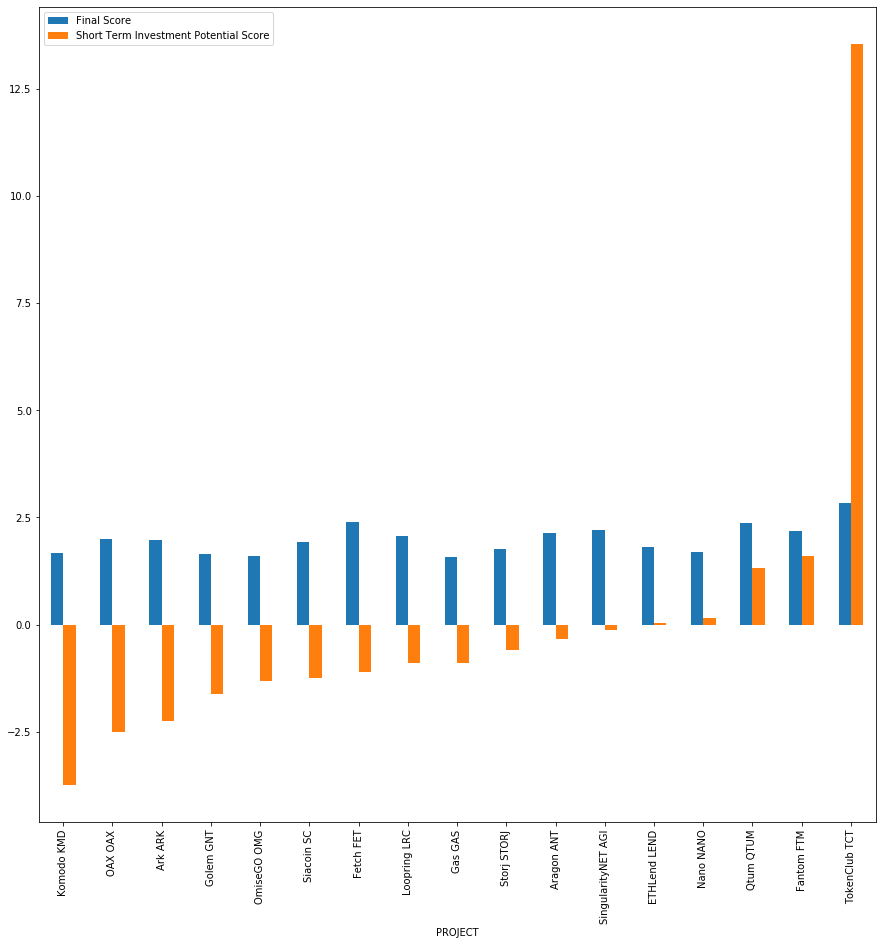

In [37]:
fcas_df.plot.bar(x= None, y=['Final Score','Short Term Investment Potential Score'],figsize=(15,15))